In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#Load dataset
data = pd.read_csv("/content/credit.csv")

In [2]:
df= data.copy()

In [3]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [4]:
df.tail()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes
999,1 - 200 DM,45,critical,car,4576,100 - 500 DM,unemployed,3,4,27,none,own,1,skilled,1,no,no


After looking at the first and last five rows, it can be observed that some of the columns have 'unknown', 'other', 'none' or 'unemployed' as a category and hence cannot be considered as an ordinal variable even though other categories within the column have a hierarchical order.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

### Observations:


---
- There are 1000 rows and total 17 columns.
- There are no missing values. However we will have to change the attributes with datatypes 'object' to 'int64' before feeding the dataset to the machine learning model.

Check if there are any duplicates in the dataset.

In [6]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print("\nDuplicate Rows = ", num_duplicates)


Duplicate Rows =  0


In [7]:
# Summary Statistics of the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [8]:
#Summary for categorical columns
df.describe(include = ['O']).T

,count,unique,top,freq
checking_balance,1000,4,unknown,394
credit_history,1000,5,good,530
purpose,1000,6,furniture/appliances,473
savings_balance,1000,5,< 100 DM,603
employment_duration,1000,5,1 - 4 years,339
other_credit,1000,3,none,814
housing,1000,3,own,713
job,1000,4,skilled,630
phone,1000,2,no,596
default,1000,2,no,700


Let's observe the sub categories frequencies for each categorical columns

In [9]:
df['checking_balance'].value_counts()

,count
checking_balance,
unknown,394
< 0 DM,274
1 - 200 DM,269
> 200 DM,63


In [10]:
df['credit_history'].value_counts()

,count
credit_history,
good,530
critical,293
poor,88
very good,49
perfect,40


In [11]:
df['purpose'].value_counts()

,count
purpose,
furniture/appliances,473
car,337
business,97
education,59
renovations,22
car0,12


Need to replace the 'car0' to 'car'

In [12]:
df['other_credit'].value_counts()

,count
other_credit,
none,814
bank,139
store,47


In [13]:
df['savings_balance'].value_counts()

,count
savings_balance,
< 100 DM,603
unknown,183
100 - 500 DM,103
500 - 1000 DM,63
> 1000 DM,48


In [14]:
df['employment_duration'].value_counts()

,count
employment_duration,
1 - 4 years,339
> 7 years,253
4 - 7 years,174
< 1 year,172
unemployed,62


In [15]:
df['housing'].value_counts()

,count
housing,
own,713
rent,179
other,108


In [16]:
df['job'].value_counts()

,count
job,
skilled,630
unskilled,200
management,148
unemployed,22


In [17]:
df['phone'].value_counts()

,count
phone,
no,596
yes,404


In [18]:
df['default'].value_counts()

,count
default,
no,700
yes,300


In [19]:
#As observed earlier need to change 'car0' to 'car' in 'purpose' column
df['purpose'] = df['purpose'].str.replace('car0', 'car')
df['purpose'].value_counts()

,count
purpose,
furniture/appliances,473
car,349
business,97
education,59
renovations,22


Exploratory Data Analysis (EDA)

In [20]:
corr = df.corr(numeric_only=True)
corr

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
months_loan_duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
percent_of_income,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
years_at_residence,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
existing_loans_count,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


<Axes: >

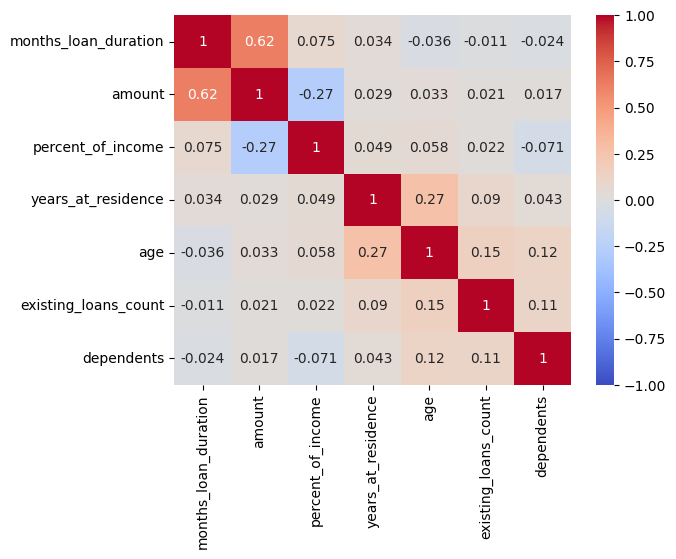

In [21]:
sns.heatmap(corr,annot=True,cmap='coolwarm', vmin=-1, vmax=1)

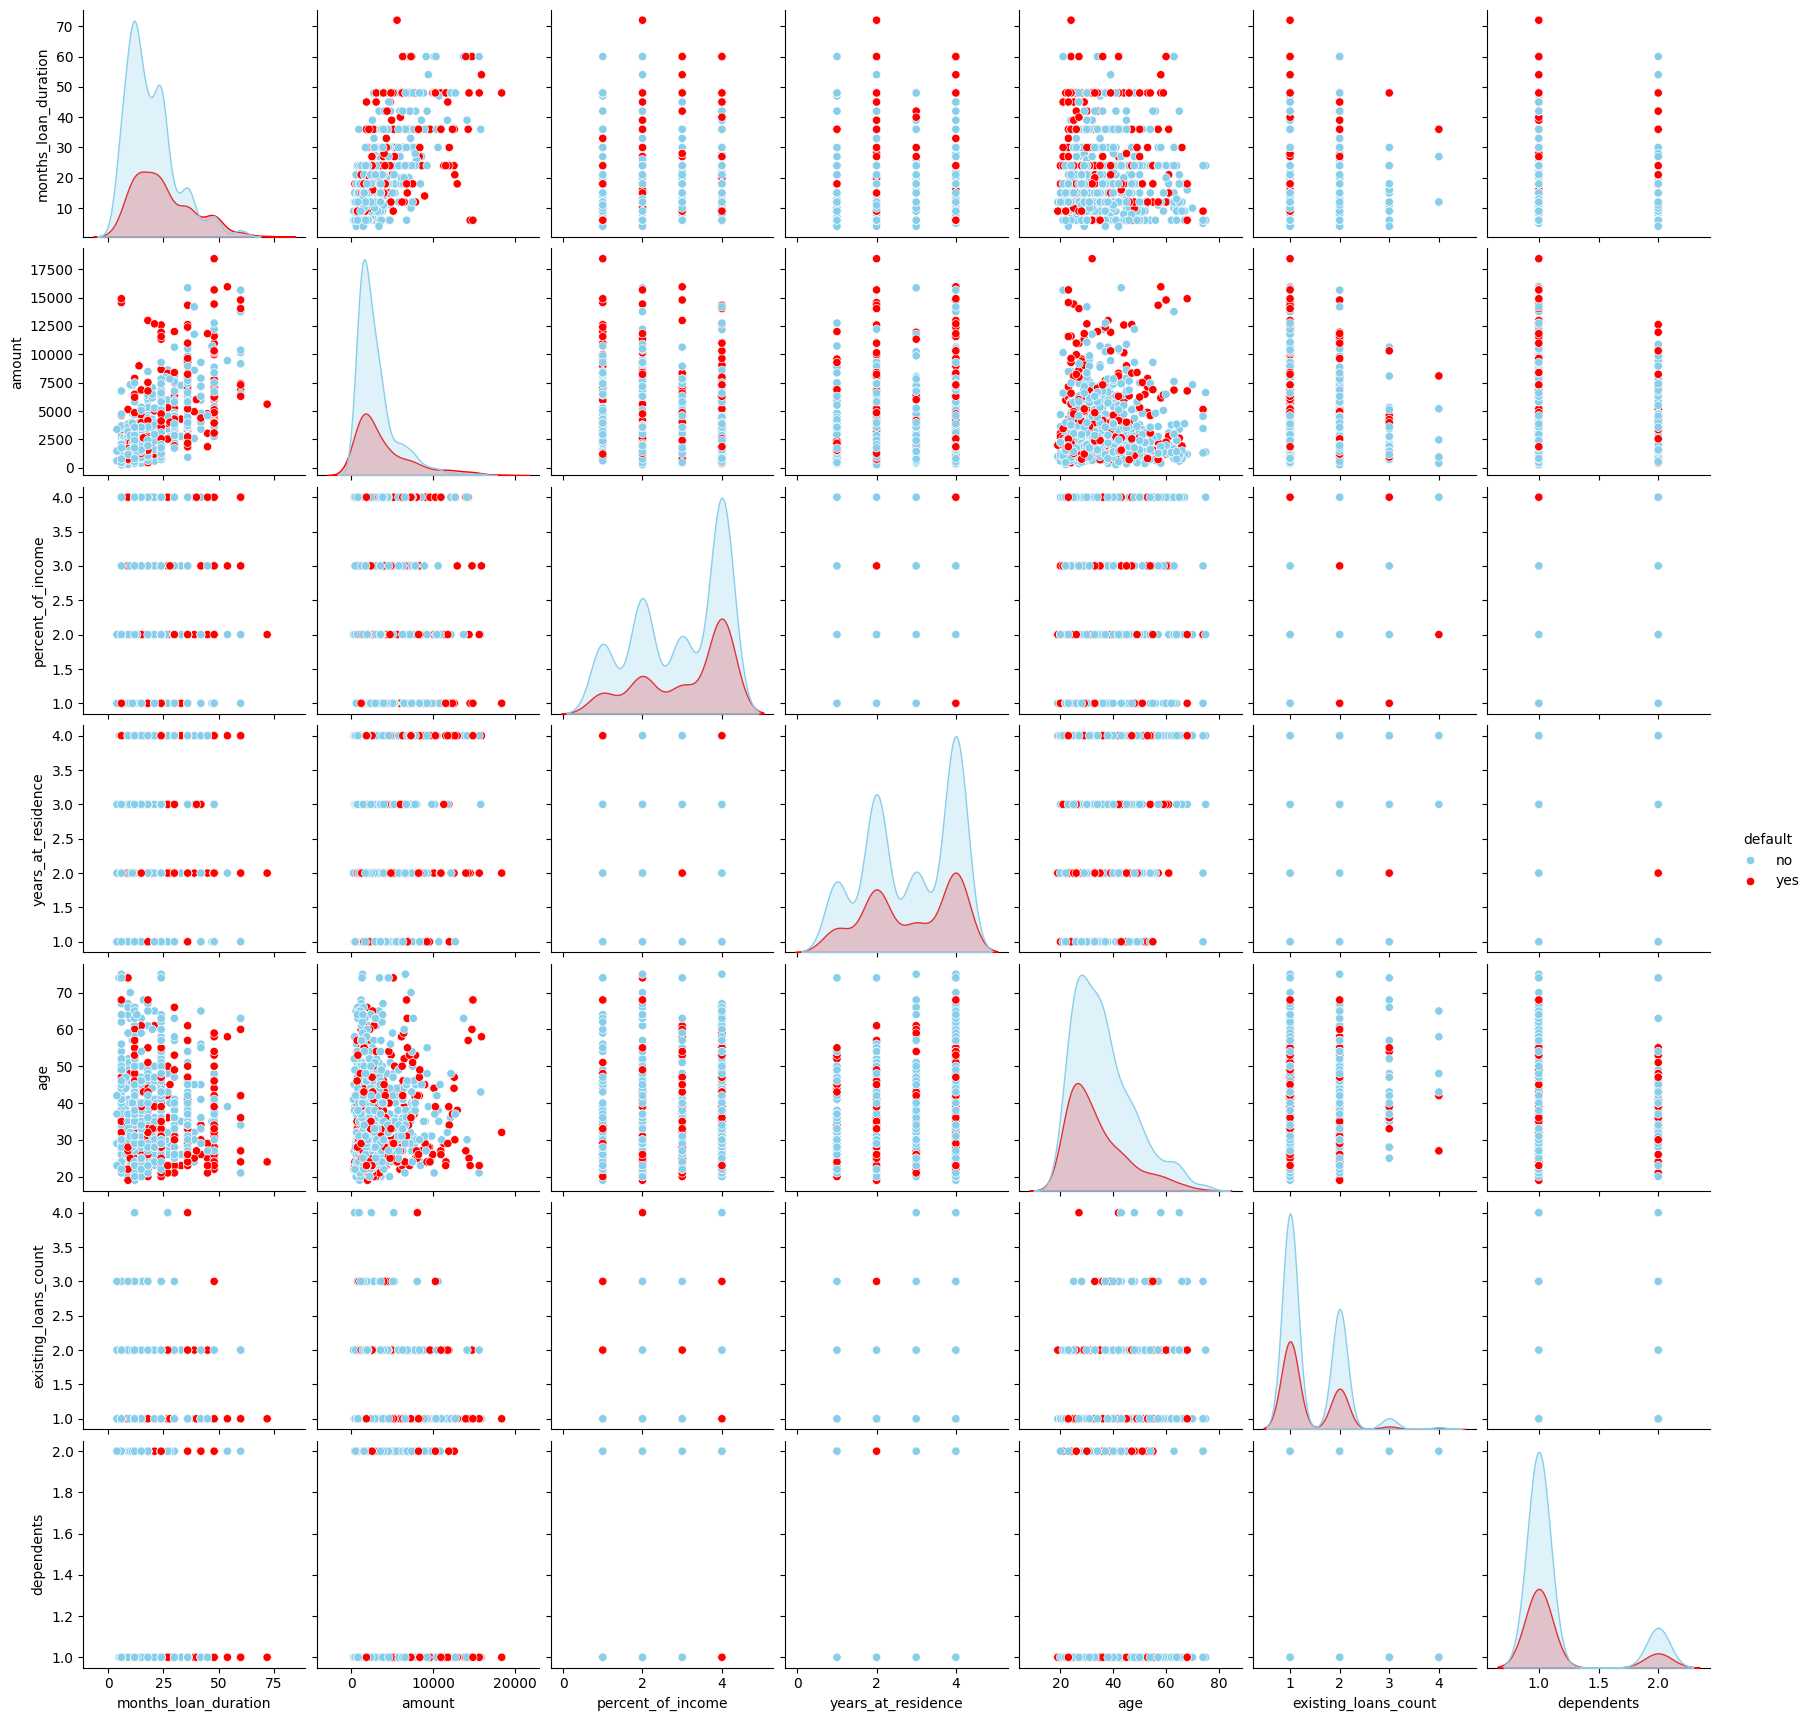

In [22]:
# Pairplot for numerical features with 'default' as the hue
sns.pairplot(df, hue='default', palette={'yes': 'red', 'no': 'skyblue'})
plt.show()

### Observations:

---


The numeric columns are not highly correlated to each other and the dataset considering only numeric columns is non-linear in nature.

In [23]:
# Considering categorical columns for EDA using 'default' column as hue.
cat_col = df.select_dtypes(include=['object'])
cat_col = cat_col.drop(columns=['default']) #Drop the 'default' column

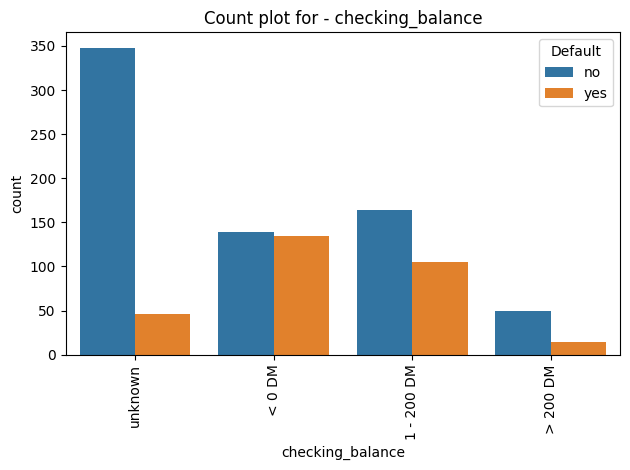

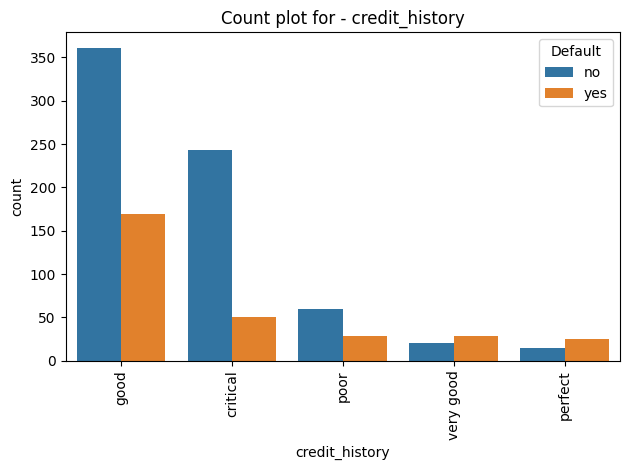

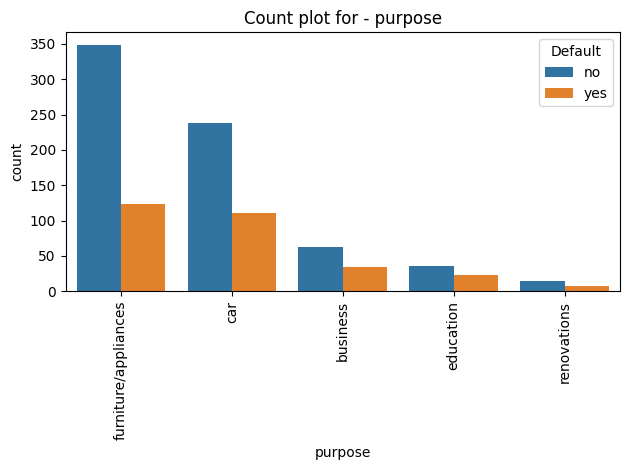

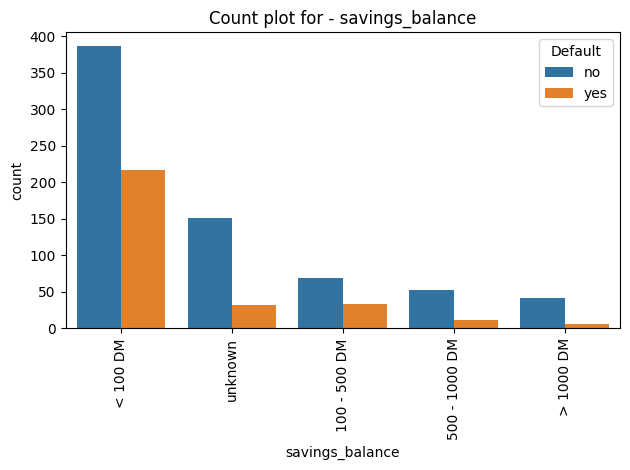

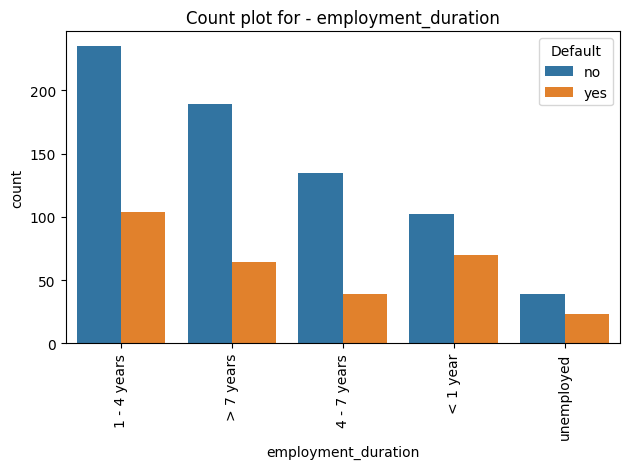

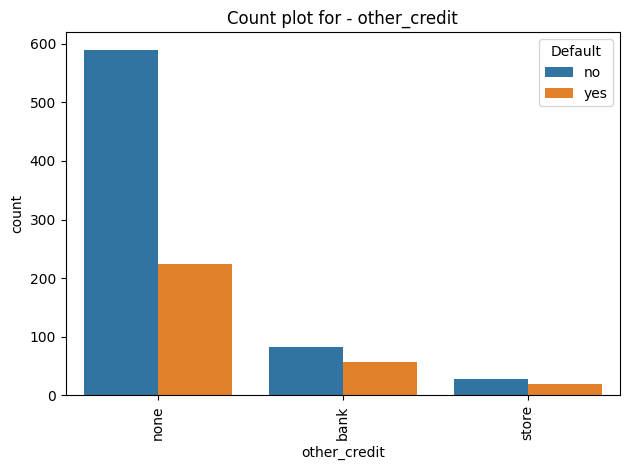

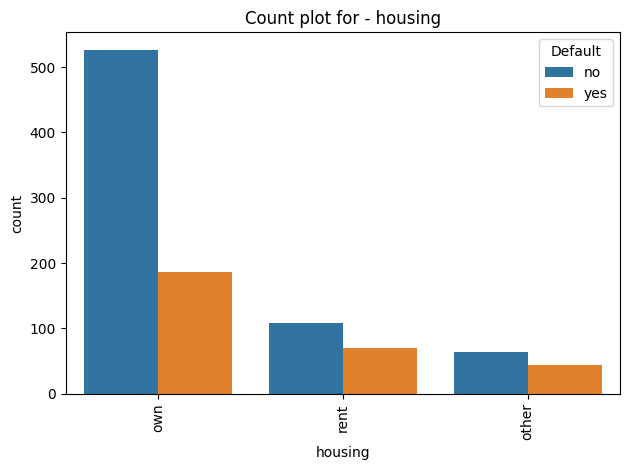

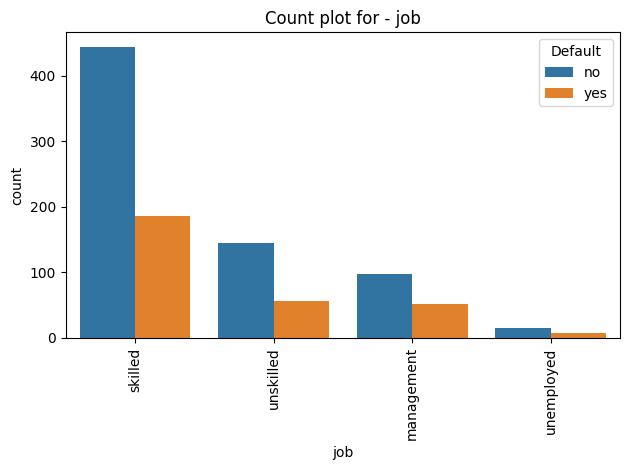

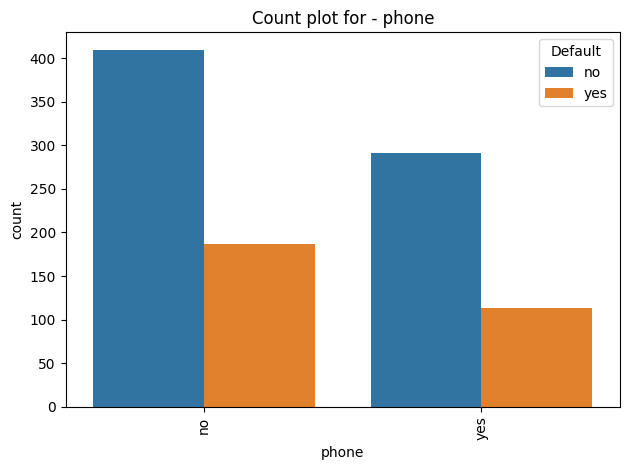

In [24]:
for cat in cat_col:
  sns.countplot(data=df, x=cat, hue='default',
                  order=df[cat].value_counts().index)
  plt.title(f'Count plot for - {cat}')
  plt.xticks(rotation=90)
  plt.legend(title='Default', loc='upper right')
  plt.tight_layout()
  plt.show()

### Observations:

---
1. An interesting yet contradictory to normal understanding, I see that people with very good credit history seem to be the more in numbers as loan defaulters.
2. Additionally, people with perfect credit history also are more in numbers when considered as loan defaulters.


## NOTE:
- Target variable ['default'] (indicates whether the customer is loan defaulter or not)
- Predictors variables:
  - Numerical Variables: ['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents']
  - Categorical Variables:
    1. Nominal columns: [ 'purpose', 'other_credit', 'housing', 'job']
    2. Ordinal columns: ['credit_history', 'checking_balance', 'employment_duration', 'savings_balance']
    3. Binary column: ['phone']

NOTE: Some of the columns having 'unknown', 'other', 'none' or 'unemployed' as a category and the rest of the values are hierarchical order so while encoding I will map these to 0 since they are typically the lowest or missing value in the hierarchy and for other values as per their ranking.

### Encoding Techniques:
- For nominal columns with no intrinsic order, I'll be using One-hot encoding technique.
- For ordinal columns with intrinsic order, I'll be mapping these categories to integers based on their rank (Ordinal Encoding).
- For binary columns, I'll be mapping these categories to integer 1 if yes and 0 if no.

In [25]:
# One-hot encoding
df_nominal_encoded = pd.get_dummies(df[['purpose', 'other_credit', 'housing', 'job']], drop_first=True).astype('int')
df_nominal_encoded

,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled
0,0,0,1,0,1,0,1,0,1,0,0
1,0,0,1,0,1,0,1,0,1,0,0
2,0,1,0,0,1,0,1,0,0,0,1
3,0,0,1,0,1,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,1,0,1,0,0,0,1
996,1,0,0,0,1,0,1,0,0,0,0
997,0,0,1,0,1,0,1,0,1,0,0
998,0,0,1,0,1,0,0,0,1,0,0


- The drop_first=True parameter avoids multicollinearity by dropping the first category in each variable.

In [26]:
# Ordinal Encoding
# Define the mappings
credit_history_map = {'critical': 0, 'poor': 1, 'good': 2, 'very good': 3, 'perfect': 4}
checking_balance_map = {'unknown': 0, '< 0 DM': 1, '1 - 200 DM': 2, '> 200 DM': 3}
employment_duration_map = {'unemployed': 0, '< 1 year': 1, '1 - 4 years': 2, '4 - 7 years': 3, '> 7 years': 4}
savings_balance_map = {'unknown': 0, '< 100 DM': 1, '100 - 500 DM': 2, '500 - 1000 DM': 3, '> 1000 DM': 4}

# Apply the mappings to the dataframe
df['credit_history'] = df['credit_history'].map(credit_history_map)
df['checking_balance'] = df['checking_balance'].map(checking_balance_map)
df['employment_duration'] = df['employment_duration'].map(employment_duration_map)
df['savings_balance'] = df['savings_balance'].map(savings_balance_map)


In [27]:
#Binary Mapping
df['phone'] = df['phone'].map({'no': 0, 'yes': 1})
df['default'] = df['default'].map({'no': 0, 'yes': 1})

In [28]:
#Combining encoded variables
numerical_cols = ['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents']
df_encoded = pd.concat([df[numerical_cols], df_nominal_encoded, df[['credit_history', 'checking_balance', 'employment_duration', 'savings_balance', 'phone', 'default']]], axis=1)


In [29]:
df_encoded.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,purpose_car,purpose_education,purpose_furniture/appliances,...,housing_rent,job_skilled,job_unemployed,job_unskilled,credit_history,checking_balance,employment_duration,savings_balance,phone,default
0,6,1169,4,4,67,2,1,0,0,1,...,0,1,0,0,0,1,4,0,1,0
1,48,5951,2,2,22,1,1,0,0,1,...,0,1,0,0,2,2,2,1,0,1
2,12,2096,2,3,49,1,2,0,1,0,...,0,0,0,1,0,0,3,1,0,0
3,42,7882,2,4,45,1,2,0,0,1,...,0,1,0,0,2,1,3,1,0,0
4,24,4870,3,4,53,2,2,1,0,0,...,0,1,0,0,1,1,2,1,0,1


In [30]:
df_encoded.tail()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,purpose_car,purpose_education,purpose_furniture/appliances,...,housing_rent,job_skilled,job_unemployed,job_unskilled,credit_history,checking_balance,employment_duration,savings_balance,phone,default
995,12,1736,3,4,31,1,1,0,0,1,...,0,0,0,1,2,0,3,1,0,0
996,30,3857,4,4,40,1,1,1,0,0,...,0,0,0,0,2,1,2,1,1,0
997,12,804,4,4,38,1,1,0,0,1,...,0,1,0,0,2,0,4,1,0,0
998,45,1845,4,4,23,1,1,0,0,1,...,0,1,0,0,2,1,2,1,1,1
999,45,4576,3,4,27,1,1,1,0,0,...,0,1,0,0,0,2,0,2,0,0


## Standardization of Numerical Variables

In [31]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns
numerical_cols = ['months_loan_duration', 'amount', 'percent_of_income',
                  'years_at_residence', 'age', 'existing_loans_count', 'dependents']

# Initialize the scaler
scaler = StandardScaler()

# Standardize the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Verify standardization
df_encoded[numerical_cols].head()


,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869


## Splitting the dataset into training and test data

In [32]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = df_encoded.drop(columns=['default'])
y = df_encoded['default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Various Machine learning models

### 1. Linear Regression Model

---
For the German-loan dataset:
- Linear Regression is not typically used for classification.
- Additionally, the dataset is non-linear in nature as per earlier EDA performed.
- Still I am using this model to prove the point that this is not the best model for these types of dataset.



In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict probabilities and convert them to binary outputs
y_pred_proba = lr_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate
print("Linear Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Linear Regression Accuracy: 0.715
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.91      0.82       141
           1       0.54      0.25      0.34        59

    accuracy                           0.71       200
   macro avg       0.64      0.58      0.58       200
weighted avg       0.68      0.71      0.68       200

ROC-AUC Score: 0.6695516288015387


### 2. Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Logistic Regression Accuracy: 0.715
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82       141
           1       0.53      0.27      0.36        59

    accuracy                           0.71       200
   macro avg       0.64      0.59      0.59       200
weighted avg       0.68      0.71      0.68       200

ROC-AUC Score: 0.6691910085346797


### 3. Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.665
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.78      0.77       141
           1       0.43      0.39      0.41        59

    accuracy                           0.67       200
   macro avg       0.59      0.58      0.59       200
weighted avg       0.66      0.67      0.66       200



### 4. Random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.95      0.86       141
           1       0.76      0.37      0.50        59

    accuracy                           0.78       200
   macro avg       0.77      0.66      0.68       200
weighted avg       0.78      0.78      0.75       200



### 5. Gradient Boosting


In [37]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = gb_model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Gradient Boosting Accuracy: 0.785
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86       141
           1       0.71      0.46      0.56        59

    accuracy                           0.79       200
   macro avg       0.76      0.69      0.71       200
weighted avg       0.78      0.79      0.77       200



### 6. Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Naive Bayes Accuracy: 0.665
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       141
           1       0.44      0.46      0.45        59

    accuracy                           0.67       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.67      0.67      0.67       200



7. SVM

In [39]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


SVM Accuracy: 0.735
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.83       141
           1       0.64      0.24      0.35        59

    accuracy                           0.73       200
   macro avg       0.69      0.59      0.59       200
weighted avg       0.71      0.73      0.69       200

ROC-AUC Score: 0.7351845173698762


### 8. KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


KNN Accuracy: 0.745
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       141
           1       0.60      0.41      0.48        59

    accuracy                           0.74       200
   macro avg       0.69      0.65      0.66       200
weighted avg       0.73      0.74      0.73       200



### 9. XGBoost

In [41]:
import xgboost as xgb

# Initialize and train the model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


XGBoost Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.84       141
           1       0.64      0.49      0.56        59

    accuracy                           0.77       200
   macro avg       0.73      0.69      0.70       200
weighted avg       0.76      0.77      0.76       200



### 10. LightGBM

In [42]:
import lightgbm as lgb

# Initialize and train the model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lgb_model.predict(X_test)

print("LightGBM Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 241, number of negative: 559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.301250 -> initscore=-0.841353
[LightGBM] [Info] Start training from score -0.841353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

### 11.CatBoost

In [43]:
!pip install catboost

In [44]:
from catboost import CatBoostClassifier

# Initialize and train the model
cb_model = CatBoostClassifier(verbose=0)
cb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = cb_model.predict(X_test)

print("CatBoost Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


CatBoost Accuracy: 0.785
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       141
           1       0.72      0.44      0.55        59

    accuracy                           0.79       200
   macro avg       0.76      0.68      0.70       200
weighted avg       0.78      0.79      0.77       200



### ROC-AUC curve for Model Selection

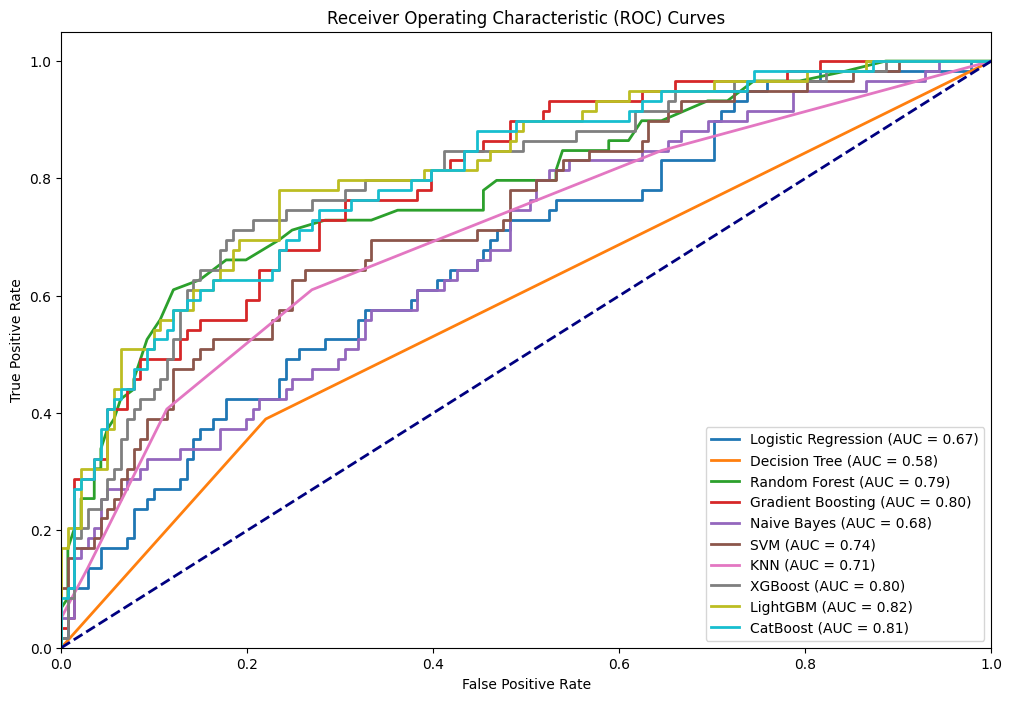

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Replace with the predicted probabilities of the positive class (defaulters) for each model
pred_probs = {
    "Logistic Regression": log_model.predict_proba(X_test)[:, 1],
    "Decision Tree": dt_model.predict_proba(X_test)[:, 1],
    "Random Forest": rf_model.predict_proba(X_test)[:, 1],
    "Gradient Boosting": gb_model.predict_proba(X_test)[:, 1],
    "Naive Bayes": nb_model.predict_proba(X_test)[:, 1],
    "SVM": svm_model.predict_proba(X_test)[:, 1],
    "KNN": knn_model.predict_proba(X_test)[:, 1],
    "XGBoost": xgb_model.predict_proba(X_test)[:, 1],
    "LightGBM": lgb_model.predict_proba(X_test)[:, 1],
    "CatBoost": cb_model.predict_proba(X_test)[:, 1]
}

plt.figure(figsize=(12, 8))

# Plot ROC curve for each model
for model_name, prob in pred_probs.items():
    fpr, tpr, _ = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot diagonal line for a random model (AUC = 0.5)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


### Summary of Model Performance

In [46]:
import pandas as pd

# Summary table filled with actual results
summary = pd.DataFrame({
    "Model": ["Linear Regression", "Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting",
              "Naive Bayes", "SVM", "KNN", "XGBoost", "LightGBM", "CatBoost"],
    "Accuracy": [0.715, 0.715, 0.685, 0.780, 0.785, 0.665, 0.735, 0.745, 0.770, 0.805, 0.785],
    "Precision (1)": [0.54, 0.53, 0.47, 0.74, 0.71, 0.44, 0.64, 0.60, 0.64, 0.76, 0.72],  # Precision for defaulters (class 1)
    "Recall (1)": [0.25, 0.27, 0.46, 0.39, 0.46, 0.46, 0.24, 0.41, 0.49, 0.49, 0.44],  # Recall for defaulters (class 1)
    "F1-Score (1)": [0.34, 0.36, 0.46, 0.51, 0.56, 0.45, 0.35, 0.48, 0.56, 0.60, 0.55],  # F1-Score for defaulters (class 1)
    "ROC-AUC": [0.670, 0.67, 0.62, 0.78, 0.8, 0.68, 0.74, 0.71, 0.8, 0.82, 0.81]  # Only provided for some models
})

# Display the summary
summary


,Model,Accuracy,Precision (1),Recall (1),F1-Score (1),ROC-AUC
0,Linear Regression,0.715,0.54,0.25,0.34,0.67
1,Logistic Regression,0.715,0.53,0.27,0.36,0.67
2,Decision Tree,0.685,0.47,0.46,0.46,0.62
3,Random Forest,0.780,0.74,0.39,0.51,0.78
4,Gradient Boosting,0.785,0.71,0.46,0.56,0.80
5,Naive Bayes,0.665,0.44,0.46,0.45,0.68
6,SVM,0.735,0.64,0.24,0.35,0.74
7,KNN,0.745,0.60,0.41,0.48,0.71
8,XGBoost,0.770,0.64,0.49,0.56,0.80
9,LightGBM,0.805,0.76,0.49,0.60,0.82


## Key Insights And Observations

---
1. Accuracy:
- The best performing model in terms of accuracy is LightGBM (0.805), followed closely by Gradient Boosting and CatBoost at 0.785.
2. Precision:
- Precision for Class 0 (Non-defaulters) is consistently high across models, with LightGBM showing the best balance between precision for both classes.
- Precision for Class 1 (Defaulters) varies more, with LightGBM and Random Forest performing relatively well.
3. Recall:
- Recall for Class 0 is high for all models, especially for SVM and LightGBM.
- Recall for Class 1 is generally lower, indicating that many defaulters are being classified as non-defaulters. The highest recall of 0.49 for class 1 is seen in both LightGBM and XGBoost.
4. F1-Score:
- F1-Score for Class 0 is strong across the board, reflecting the model's ability to accurately classify non-defaulters.
- F1-Score for Class 1 is lower across the board, with LightGBM model again showing the best performance, followed by XGBoost and Gradient Boosting.
5. ROC-AUC:
- LightGBM performed best in ROC-AUC score (0.735), suggesting it does a better job at distinguishing between the two classes compared to the other models.




## Recommendations:

---
- LightGBM appears to be the best overall model in this context due to its highest accuracy, balanced precision, recall, and F1-scores.
- Gradient Boosting and CatBoost are also strong contenders, with relatively good performance across multiple metrics.
- Random Forest and XGBoost also perform well but may be slightly less balanced compared to LightGBM.
